In [3]:
#Vi du demo voi matrix
import numpy as np

A = np.array([[1,2,3],[4,5,6],[7,8,9],[10,11,12]])
print(A)

r, c = A.shape
print ( "Old dimension", (r, c) )

scale = 2
r_new = scale*r - 1
c_new = scale*c - 1

B = np.zeros((r_new, c_new))
B[0:r_new:scale, 0:c_new:scale] = A[0:r, 0:c]
print(B)


[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
Old dimension (4, 3)
[[ 1.  0.  2.  0.  3.]
 [ 0.  0.  0.  0.  0.]
 [ 4.  0.  5.  0.  6.]
 [ 0.  0.  0.  0.  0.]
 [ 7.  0.  8.  0.  9.]
 [ 0.  0.  0.  0.  0.]
 [10.  0. 11.  0. 12.]]


In [39]:
"""
 use bilinear interpolation to resize an image
"""
from PIL import Image
import cv2
import matplotlib.pyplot as plt

def resizeImage(name, scale):
    img1 = Image.open(name)
    old = np.asarray(img1)  # convert to Numpy array
    rows, cols, layers = old.shape
    plt.imshow(old)
    new = np.zeros((rows*scale-1, cols*scale-1, layers))
    
    for layer in range(4):
        new[:, :, layer] = resizeLayer(old[:, :, layer], scale)
    
    # convert the values to unsigned, 8-bit integers
    new = new.astype(np.uint8)
    img2 = Image.fromarray(new) # convert back to Image
    newName = 'resize.png'
    img2.save(newName)

def resizeLayer(old, scale):
    rows, cols = old.shape

    # move old points
    rNew = scale*rows - 1
    cNew = scale*cols - 1
    new = np.zeros((rNew, cNew))

    new[0:rNew:scale, 0:cNew:scale] = old[0:rows, 0:cols]

    # produce vertical values
    new[1: rNew:scale, :] = (new[0:rNew-1:2, :] + new[2:rNew:2, :])/2

    # produce horizontal values
    new[:, 1:cNew:scale] = (new[:, 0:cNew-1:2] + new[:, 2:cNew:2])/2

    # produce center values
    new[1:rNew:scale, 1:cNew:scale] = ( new[0:rNew-2:2, 0:cNew-2:2] + 
                                        new[0:rNew-2:2, 2:cNew:2] +
                                        new[2:rNew:2, 0:cNew-2:2] + 
                                        new[2:rNew:2, 2:cNew:2]) / 4
    
    return new




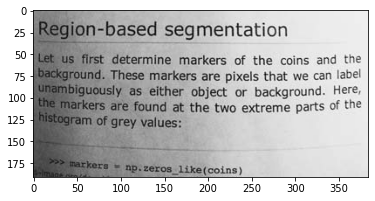

In [40]:
resizeImage('./Image/page.png', 2)